In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv("Meteorite_Landings.csv")
df.head()               

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [ ]:
df.tail()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,1976.0,33.98333,-115.68333,"(33.98333, -115.68333)"


In [ ]:
df = df.rename(columns={"recclass": "class", "reclat": "latitude", "reclong": "longitude"})
df.head()

,name,id,nametype,class,mass (g),fall,year,latitude,longitude,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [ ]:
df.shape

(45716, 10)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [ ]:
df.count()

name           45716
id             45716
nametype       45716
class          45716
mass (g)       45585
fall           45716
year           45425
latitude       38401
longitude      38401
GeoLocation    38401
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.head()

,name,id,nametype,class,mass (g),fall,year,latitude,longitude,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [ ]:
df.count()

name           45716
id             45716
nametype       45716
class          45716
mass (g)       45585
fall           45716
year           45425
latitude       38401
longitude      38401
GeoLocation    38401
dtype: int64

In [ ]:
df['class'].value_counts()

L6         8285
H5         7142
L5         4796
H6         4528
H4         4211
           ... 
EL7           1
CH/CBb        1
H/L~4         1
LL3.7-6       1
L/LL          1
Name: class, Length: 466, dtype: int64

In [ ]:
print(df.isnull().sum())

name              0
id                0
nametype          0
class             0
mass (g)        131
fall              0
year            291
latitude       7315
longitude      7315
GeoLocation    7315
dtype: int64


In [ ]:
df = df.dropna()
df.count()

name           38115
id             38115
nametype       38115
class          38115
mass (g)       38115
fall           38115
year           38115
latitude       38115
longitude      38115
GeoLocation    38115
dtype: int64

In [ ]:
print(df.isnull().sum())

name           0
id             0
nametype       0
class          0
mass (g)       0
fall           0
year           0
latitude       0
longitude      0
GeoLocation    0
dtype: int64


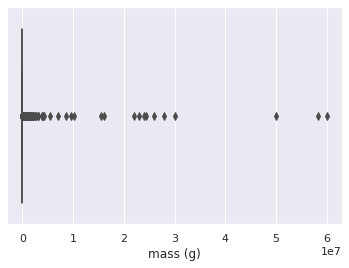

In [ ]:
sns.boxplot(x=df['mass (g)'])

In [ ]:
df.describe()

,id,mass (g),year,latitude,longitude
count,38115.000000,3.811500e+04,38115.000000,38115.000000,38115.000000
mean,25343.139000,1.560071e+04,1989.993913,-39.596529,61.309359
std,17395.360205,6.286817e+05,25.469892,46.175830,80.777583
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,10831.500000,6.630000e+00,1986.000000,-76.716670,0.000000
50%,21732.000000,2.909000e+01,1996.000000,-71.500000,35.666670
75%,39887.500000,1.872900e+02,2002.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,178.200000


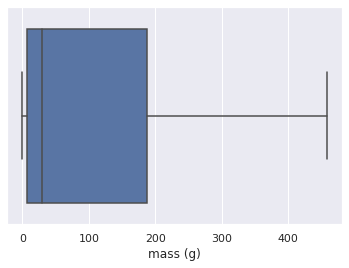

In [ ]:
sns.boxplot(x=df['mass (g)'], showfliers=False)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id           29056.00000
mass (g)       180.66000
year            16.00000
latitude        76.71667
longitude      157.16667
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(31738, 10)

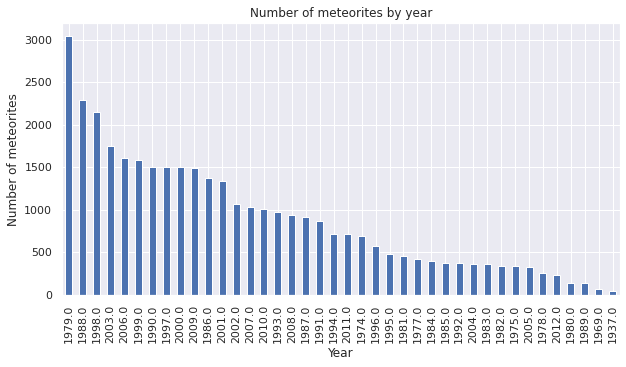

In [ ]:
df.year.value_counts().nlargest(40).plot(kind='bar', figsize=(10, 5))
plt.title("Number of meteorites by year")
plt.ylabel('Number of meteorites')
plt.xlabel('Year');

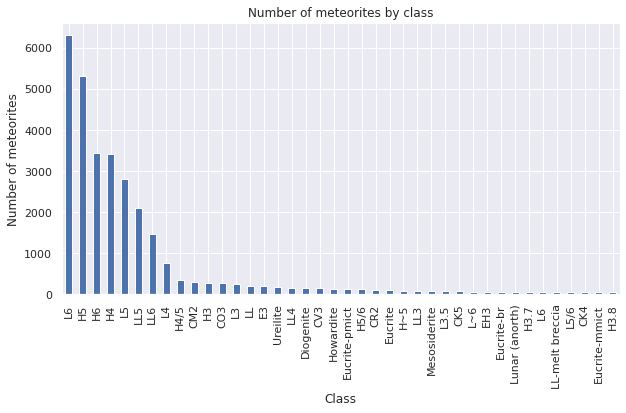

In [ ]:
df['class'].value_counts().nlargest(40).plot(kind='bar', figsize=(10, 5))
plt.title("Number of meteorites by class")
plt.ylabel('Number of meteorites')
plt.xlabel('Class');

,id,mass (g),year,latitude,longitude
id,1.000000,-0.056198,0.602697,0.407276,-0.441195
mass (g),-0.056198,1.000000,0.124319,0.312772,-0.155516
year,0.602697,0.124319,1.000000,0.465574,-0.195780
latitude,0.407276,0.312772,0.465574,1.000000,-0.573616
longitude,-0.441195,-0.155516,-0.195780,-0.573616,1.000000


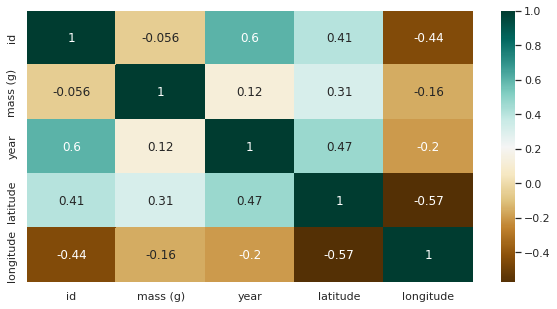

In [ ]:
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c